
<table width="100%"  alignt="left" position="absolute" style="font-family:verdana;font-size:10px;color:black"  >
   <thead>
      <tr style="width:20%;">
         <td   rowspan="5">
            <img  src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQG0LSU20JCX7v7iAIc0FrPRJOloXv20rr1ZRV2DE6IuDXZwVc5Vf9awP7-mfHQXQl7BSI&usqp=CAU" alt="drawing" style="height:50px!important;width: 120px;"/>
         </td>
         <td style="font-size:10px" ><b>Universidad Internacional de Valencia</b></td>
      </tr>
      <tr>
         <td  style="font-size:9px"><b>Maestria en Big Data y Ciencia de Datos</b></td>
      </tr>
      <tr  style="font-size:9px">
         <td  >TFM - Detección de outliers en
            transacciones de retiro de
            efectivo <br>aplicando un modelo
            híbrido de ciencia de datos
         </td>
      </tr>
      <tr  style="font-size:9px">
         <td  >Enrique Abraham Magnani Quiñonez</td>
      </tr>
   </thead>
</table>

#Instalación

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1

#Librerías

In [ ]:
import sys
print(sys.version)

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


##Manipulacion de datos

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import os

<ipython-input-4-02408cdd9df0>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


##Graficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Validacion

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

##Modelos ML

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier

## Ambiente

In [ ]:
from google.colab import drive

#Parametros

Configuracion del ambiente

In [ ]:
drive.mount('/content/drive/', force_remount=True)

'''
V6 - 1387 - Resumidos etiquetados
V4 - 110114 - Anonimizado
'''
fecha_inicial=datetime.now()
w_ruta_GD='/content/drive/MyDrive/VIU/TFM/Desarrollo/'

w_ruta=w_ruta_GD+"Data/DF_Resumido_etiquetado.csv"
w_ruta_final=w_ruta_GD+"Data/DF_Anonimizado.csv"
w_ruta_pd="Data/RP_Data_Entrenamiento.html"
w_ruta_pdp="Data/RP_Data_Prueba.html"

w_random=1990
np.random.seed(w_random)

Mounted at /content/drive/


Generacion de bitacora para almacenamiento de graficos.

In [ ]:
os.makedirs(w_ruta_GD+"Graficas/"+fecha_inicial.strftime("%Y-%m-%d %H%M%S"), exist_ok=True)

Listado de atributos

In [ ]:
#lst_columnas_int64=['MON_MOVIMIENTO_QUETZALIZADO','NUM_CTA_DEB','hora','PAIS_ORIGEN','COD_MONEDA_ORIGEN','COD_PROD_EMISOR']
lst_columnas_int64=['NUM_AUTORIZACION_TC','MON_MOVIMIENTO_QUETZALIZADO','NUM_CTA_DEB','hora','PAIS_ORIGEN','COD_MONEDA_ORIGEN','COD_PROD_EMISOR','TIP_NEGOCIO','IND_ANOMALA','IND_ESTADO_INACTIVA','PORC_RETIRO','CNT_CUENTAS_DISTINTAS','IND_DEBAJO_UMBRAL_15K','IND_SUP_15K','CNT_RETIRO_CUENTA','CNT_CAJEROS_DISTINTOS']

#df_columnas=['NUM_AUTORIZACION_TC','MON_MOVIMIENTO_QUETZALIZADO','FEC_AUTORIZACION','TIP_NEGOCIO','PAIS_ORIGEN','COD_MONEDA_ORIGEN','COD_PROD_EMISOR','NUM_CTA_DEB','COD_CLIENTE','IND_ANOMALA']
df_columnas=['NUM_AUTORIZACION_TC','MON_MOVIMIENTO_QUETZALIZADO','FEC_AUTORIZACION','TIP_NEGOCIO','PAIS_ORIGEN','COD_MONEDA_ORIGEN','COD_PROD_EMISOR','NUM_CTA_DEB','COD_CLIENTE','IND_ANOMALA','IND_ESTADO_INACTIVA','PORC_RETIRO','CNT_CUENTAS_DISTINTAS','IND_DEBAJO_UMBRAL_15K','IND_SUP_15K','CNT_RETIRO_CUENTA','CNT_CAJEROS_DISTINTOS']

lst_modelo=['MON_MOVIMIENTO_QUETZALIZADO','hora','TIP_NEGOCIO','COD_MONEDA_ORIGEN','PAIS_ORIGEN']
lst_reglas=['IND_ESTADO_INACTIVA','PORC_RETIRO','CNT_CUENTAS_DISTINTAS','IND_DEBAJO_UMBRAL_15K','IND_SUP_15K','CNT_RETIRO_CUENTA','CNT_CAJEROS_DISTINTOS']


#Funciones

##Descriptivas

In [ ]:
def fn_descripcion_dataFrame(i_df_desc):
    print("Dimensiones dataframe: ",i_df_desc.shape)
    print("")
    print(i_df_desc.dtypes)

##Segmentacion de datos

In [ ]:
def fn_calculo_test(i_df_global,i_columnas):
  #Nuevas columnas
  i_df_global['periodo'] = (((i_df_global['FEC_AUTORIZACION'].dt.year).astype(str)) + ((i_df_global['FEC_AUTORIZACION'].dt.month).astype(str))).astype(int)  
  #Se define que tome como test preliminar el ultimo mes obtenido del analisis
  valor_maximo = i_df_global['periodo'].max()
  #i_df_global
  w_df_entrenamiento = i_df_global[(i_df_global['periodo'] != valor_maximo)]
  w_df_test= i_df_global[(i_df_global['periodo'] == valor_maximo)]
  print("w_df_entrenamiento",w_df_entrenamiento['FEC_AUTORIZACION'].min(),w_df_entrenamiento['FEC_AUTORIZACION'].max())
  print("w_df_test",w_df_test['FEC_AUTORIZACION'].min(),w_df_test['FEC_AUTORIZACION'].max())
  return w_df_entrenamiento[i_columnas],w_df_test[i_columnas]

##Enfoque de reglas

In [ ]:
def fn_clasificador_transacciones_bancarias(i_ind_reglas):
  if i_ind_reglas == 1:
    return 'BAJA'
  if i_ind_reglas == 2:
    return 'MEDIA'
  if i_ind_reglas == 3:
    return 'ALTA'
  else:
    return 'NA'

In [ ]:
def fn_calcular_categoria(i_df):
  #Calculo de indicadores por categoria de reglas
  i_df['IND_ACTIVIDAD']=np.where((i_df['IND_ESTADO_INACTIVA'] > 0) | (i_df['CNT_CUENTAS_DISTINTAS'] > 1), 1, 0)
  i_df['IND_CANTIDAD']=np.where((i_df['PORC_RETIRO'] >= 0.5) | (i_df['IND_DEBAJO_UMBRAL_15K'] > 0) | (i_df['IND_SUP_15K'] > 0)| (i_df['CNT_RETIRO_CUENTA'] > 1), 1, 0)
  i_df['IND_LOCALIZACION']=np.where((i_df['CNT_CAJEROS_DISTINTOS'] > 1) , 1, 0)

  i_df['IND_REGLAS']=(i_df['IND_ACTIVIDAD']+i_df['IND_CANTIDAD']+i_df['IND_LOCALIZACION'])
  i_df['IND_CLASE_REGLAS'] = i_df['IND_REGLAS'].apply(lambda x: fn_clasificador_transacciones_bancarias(x))
  return i_df

##Enfoque de modelos

###Implementación de GridSearch

**4.7.1**

In [ ]:
def fn_calculo_modelo(i_dict_modelos,i_df,i_cliente,i_df_test):
  i_cliente=np.int64(i_cliente)
  pred=0
  pred_SVM=np.array([1])
  pred_IF=np.array([1])
  y_pred_RF=np.array([1])
  y_pred_GN=np.array(['NA'])
  acc_SVM=np.array([1])
  acc_IF=np.array([1])
  acc_RF=np.array([1])
  #print("Cliente",i_cliente)
  if i_cliente in i_df.index:
    df_resultado=i_df.loc[np.int64(i_cliente)]
    if df_resultado['NUM_CTA_DEB'].isin([i_df_test['NUM_CTA_DEB'].iloc[0]]).any()==True:
      df_resultado=df_resultado[df_resultado['NUM_CTA_DEB']==i_df_test['NUM_CTA_DEB'].iloc[0]]
      w_1D = (df_resultado.ndim == 1)
      if(w_1D==False):
        # Escalado de los datos
        scaler = StandardScaler()
        w_train = scaler.fit_transform(df_resultado[lst_modelo])
        w_test = scaler.transform(i_df_test[lst_modelo])
        
        # Entrenamiento del modelo SVM
        if 'SVM' in i_dict_modelos:
          model=i_dict_modelos['SVM']
          model.fit(w_train)
          pred_SVM = model.predict(w_test)
          #print("Evaluar modelo SVM")
          if 'IND_ANOMALA' in i_df_test.columns:
            y_test = i_df_test['IND_ANOMALA'].copy().values
            acc_SVM=fn_validacion_cruzada('SVM',model,w_train,w_test,y_test) 

        # Entrenamiento del modelo Isolation Forest
        if 'IF' in i_dict_modelos:
          IFmodel=i_dict_modelos['IF']
          IFmodel.fit(w_train)
          pred_IF = IFmodel.predict(w_test)
          #print("Evaluar modelo IF")
          if 'IND_ANOMALA' in i_df_test.columns:
            y_test = i_df_test['IND_ANOMALA'].copy().values
            acc_IF=fn_validacion_cruzada('IF',IFmodel,w_train,w_test,y_test)

        #Entrenamiento del modelo Random Forest
        if 'RF' in i_dict_modelos:
          y_train = df_resultado['IND_ANOMALA'].copy().values
          RFclf=i_dict_modelos['RF']
          w_train=w_train.tolist()
          y_train=y_train.tolist()
          w_test=w_test.tolist()

          RFclf.fit(w_train,y_train)
          y_pred_RF = RFclf.predict(w_test)
          #print("Evaluar modelo RF")
          if 'IND_ANOMALA' in i_df_test.columns:
            y_test = i_df_test['IND_ANOMALA'].copy().values
            acc_RF=fn_validacion_cruzada('RF',RFclf,[w_train,y_train],w_test,y_test)

        #Modelo GN
        i_df_test[lst_reglas]

        w_test = scalerGN.transform(i_df_test[lst_reglas])
        y_pred_GN = clf.predict(w_test)
        #print("SVM",model,"IF",IFmodel,"RF",RFclf)
        #print(type(pred_SVM),pred_SVM,type(pred_IF),pred_IF,type(y_pred_RF),y_pred_RF,type(y_pred_GN),y_pred_GN)
        #print("Pred valor SVM: ",pred_SVM.astype(int),"Pred valor IF: ",pred_IF.astype(int),"Pred valor RF: ",y_pred_RF.astype(int),"Pred valor GS:",y_pred_GN.astype(str))
  return pred_SVM,pred_IF,y_pred_RF,y_pred_GN.astype(str),acc_SVM,acc_IF,acc_RF

In [ ]:
def fn_evaluacion_modelos(i_modelo,i_df_y_pred,i_y_test):  
  i_y_pred=fn_Seleccionar_caracteristicas(i_modelo,i_df_y_pred)
  #Transformacion en visualizacion de etiquetas
  rauc=0
  i_msg_sens=""
  i_msg_f1=""
  #Conversion para metricas 
  i_y_pred=i_y_pred.replace({"-1": -1,"1": 1})
  i_y_test=i_y_test.replace({"-1": -1,"1": 1})
  if i_modelo!="GN":
    #rauc = roc_auc_score(i_y_test, i_y_pred)
    sens = recall_score(i_y_test, i_y_pred, pos_label=-1)
    i_msg_sens='\n'+('Sensibilidad {:.2f}%'.format(sens*100))
    f1=f1_score(i_y_test, i_y_pred)
    i_msg_f1='\n'+('Metrica F1 {:.2f}%'.format(f1*100))

  i_y_pred=i_y_pred.replace({-1: "Anomala",1: "Legitima"})
  i_y_test=i_y_test.replace({-1: "Anomala",1: "Legitima"})

  #Creacion de etiqueta
  lst_items=pd.concat([i_y_test, i_y_test], axis=0)
  lst_items=lst_items.unique().tolist()

  #Configuracion de matriz de confusion
  cm=confusion_matrix(i_y_test,i_y_pred,labels=lst_items)
  ac=accuracy_score(i_y_test,i_y_pred)

  ax = sns.heatmap(cm, annot=True, cmap='Blues')

  ax.set_title('Matriz de confusión - '+i_modelo+'\n'+('Precision {:.2f}%'.format(ac*100))+i_msg_sens+i_msg_f1+'\n\n');
  ax.set_xlabel('\nValores predictas')
  ax.set_ylabel('Valores actuales ');

  ax.xaxis.set_ticklabels(lst_items)
  ax.yaxis.set_ticklabels(lst_items)
  w_ruta_grafico=w_ruta_GD+'Graficas/'+fecha_inicial.strftime("%Y-%m-%d %H%M%S")+'/EM_'+i_modelo+"_"+fecha_inicial.strftime("%Y-%m-%d %H%M%S")
  plt.savefig(w_ruta_grafico)
  plt.show()


### Manipulación de métricas

In [ ]:
def fn_Convertir_valor(x):
  if x == 1:
    return "1"
  if x == -1:
    return "-1"
  else:
    return x

In [ ]:
def fn_Convertir_valor_binario(x):
  if (x == 1) or (x == "1"):
    return "1"
  if  (x == -1) or (x == "-1"):
    return "0"
  else:
    return x

In [ ]:
def fn_Seleccionar_caracteristicas(i_modelo,i_df_y_pred):
  w_ls_campo='IND_ANOMALA_'+i_modelo
  return i_df_y_pred[w_ls_campo].apply(fn_Convertir_valor)

In [ ]:
def fn_Seleccionar_ACC(i_modelo,i_df_y_pred):
  w_ls_campo='IND_ACC_'+i_modelo
  return i_df_y_pred[w_ls_campo]

### Validación cruzada

In [ ]:
def fn_validacion_cruzada(i_str_modelo,i_modelo_x,i_entrenamiento_x,i_y_test_x,i_y_real_x):
  #Definir el número de pliegues
  n_splits = 5

  #Crear el objeto KFold para dividir los datos
  kf = KFold(n_splits=n_splits)
  
  #Inicializar el array que guardará los resultados
  results = []
  for train_index, test_index in kf.split((i_entrenamiento_x if i_str_modelo != 'RF' else i_entrenamiento_x[0])):
    #print('Iteracion')
    if i_str_modelo != 'RF':
      i_modelo_x.fit(i_entrenamiento_x[train_index])
    else:
      w_x_x=i_entrenamiento_x[0]
      w_y_x=i_entrenamiento_x[1]
      w_x_x=[w_x_x[i] for i in train_index]
      w_y_x=[w_y_x[i] for i in train_index]

      i_modelo_x.fit(w_x_x,w_y_x)

    #Predecir los valores para los datos de prueba y calcular la exactitud
    if i_str_modelo != 'RF':
      y_pred_mod = i_modelo_x.predict(i_y_test_x)
      # Guardar el resultado
      results.append(1 if y_pred_mod == i_y_real_x else 0)
    else:
      y_pred_mod = i_modelo_x.predict(i_y_test_x)
      results.append(1 if y_pred_mod == i_y_real_x else 0)

  # Calcular la exactitud promedio
  mean_acc = sum(results) / n_splits
  #print("Pred media:",i_str_modelo,mean_acc)
  return mean_acc

##Descarga de dataframe

In [ ]:
def fn_df_to_CSV(i_df,i_alias):
  w_ruta=w_ruta_GD+'Resultados/'+i_alias+"_"+fecha_inicial.strftime("%Y-%m-%d %H%M%S")+'.csv'
  print("Guadar archivo",w_ruta)
  i_df.to_csv(w_ruta, index=False)

##Prototipo de proceso Lambda

In [ ]:
def fn_descarga_variables_modelo (i_modelo,i_cliente):
    if str(type(i_modelo))=="<class 'sklearn.svm._classes.OneClassSVM'>":
        o_carpeta = 'SVM'
        np.savetxt(o_carpeta+'\\sv_' + str(i_cliente) + '.txt', i_modelo.support_vectors_, delimiter=',')
        np.savetxt(o_carpeta+'\\dc_' +  str(i_cliente) + '.txt', i_modelo.dual_coef_, delimiter=',')
        np.savetxt(o_carpeta+'\\it_' +  str(i_cliente) + '.txt', i_modelo.intercept_, delimiter=',')

##Construccion de modelo hibrido

In [ ]:
def fn_construccion_modelo_hibrido(i_df_resultados,i_modelo,i_iolier):
  i_modelo='IND_ANOMALA_'+i_modelo
  i_df_resultados=i_df_resultados[['NUM_AUTORIZACION_TC',i_modelo,'IND_ANOMALA_GN']]
  if i_iolier == 'out':
    return i_df_resultados[(i_df_resultados[i_modelo] == -1) & ((i_df_resultados['IND_ANOMALA_GN'] == 'ALTA')|(i_df_resultados['IND_ANOMALA_GN'] == 'MEDIA'))]
  else:
    return i_df_resultados[(i_df_resultados[i_modelo] == -1) & ((i_df_resultados['IND_ANOMALA_GN'] == 'BAJA')|(i_df_resultados['IND_ANOMALA_GN'] == 'NA'))]

##Bitacoras

In [ ]:
def fn_registro_log(i_fecha_inicial):
  fecha_final=datetime.now()

  diferencia = fecha_final - i_fecha_inicial
  i_fecha_inicial=i_fecha_inicial.strftime("%Y-%m-%d %H:%M:%S")
  fecha_final=fecha_final.strftime("%Y-%m-%d %H:%M:%S")
  diferencia=str(diferencia)
  horas, minutos, segundos = diferencia.split(":")
  diferencia_final = f"{horas}:{minutos}:{segundos[:2]}"


  with open(w_ruta_GD+'Log/log_ejecucion.txt', "a+") as archivo:
      # Escribir la cadena de texto en el archivo
      archivo.write("\n"+i_fecha_inicial+' - '+fecha_final+' ['+diferencia_final+']')

  # Cerrar el archivo
  archivo.close()

##Modelo hibrido

In [ ]:
def fn_asignacion_parametros_modelo(i_modelo,i_parametros):
  w_modelo=None
  #if(i_modelo=="KMEANS"):
  #  w_modelo=KMeans()
  if(i_modelo=="RF"):
    w_modelo=RandomForestClassifier()
  if(i_modelo=="SVM"):
    w_modelo=OneClassSVM()
  if(i_modelo=="IF"):
    w_modelo=IsolationForest()
  #Asignacion de parametros al modelo
  w_modelo.set_params(**i_parametros)
  return w_modelo

In [ ]:
def fn_evaluacion_modelos_grid(i_configuracion,i_modelo,i_df_y_pred,i_y_test,i_cnf_modelo):  
  i_y_pred=fn_Seleccionar_caracteristicas(i_modelo,i_df_y_pred)
  i_acc_pred=fn_Seleccionar_ACC(i_modelo,i_df_y_pred)
  acc_mod=i_acc_pred.mean()
  #print("ACC del modelo es:",acc_mod)
  #Transformacion en visualizacion de etiquetas
  ac=0
  sens=0
  f1=0
  #Conversion para metricas 
  i_y_pred=i_y_pred.replace({"-1": -1,"1": 1})
  i_y_test=i_y_test.replace({"-1": -1,"1": 1})
  #rauc = roc_auc_score(i_y_test, i_y_pred)
  sens = recall_score(i_y_test, i_y_pred, pos_label=-1)
  f1=f1_score(i_y_test, i_y_pred)
  ac=accuracy_score(i_y_test,i_y_pred)
  return [i_configuracion,i_modelo,ac,sens,f1,acc_mod,i_cnf_modelo]

In [ ]:
def fn_registra_resultados_grid(i_resultados):
  #print(i_resultados)
  global df_grid_resultados
  df_grid_resultados=df_grid_resultados.append({'CONFIGURACION':i_resultados[0],'MODELO':i_resultados[1],'RESULTADO_AC':i_resultados[2],'RESULTADO_SENS':i_resultados[3],'RESULTADO_F1':i_resultados[4],'RESULTADO_ACC':i_resultados[5],'CONFIGURACION_MODELO':i_resultados[6]},ignore_index=True)

In [ ]:
def fn_evaluar_modelo(i_df_recorrido,i_param_grid,i_df_modelo,i_final):
  lst_recorrido=['NUM_AUTORIZACION_TC','IND_ANOMALA','IND_CLASE_REGLAS']
  if i_final==True:
    lst_recorrido.remove('IND_ANOMALA')
  #Preparar Y test
  i_df_recorrido=fn_calcular_categoria(i_df_recorrido)
  df_y_test=i_df_recorrido[lst_recorrido].reset_index(drop=False).drop('COD_CLIENTE', axis=1).copy()
  w_cnt_cnf=0
  w_cnt_mod=0
  #w_df_resultados = pd.DataFrame()
  w_df_resultados = pd.DataFrame(columns=['NUM_AUTORIZACION_TC','IND_ANOMALA_SVM','IND_ANOMALA_IF','IND_ANOMALA_RF','IND_ANOMALA_GN','IND_ACC_SVM','IND_ACC_IF','IND_ACC_RF'])
  w_cnt_cnf=(len(i_param_grid))
  for indice, i_iteracion_gs in enumerate(i_param_grid):
    w_dict_modelo={}
    w_df_resultados = pd.DataFrame(columns=['NUM_AUTORIZACION_TC','IND_ANOMALA_SVM','IND_ANOMALA_IF','IND_ANOMALA_RF','IND_ANOMALA_GN','IND_ACC_SVM','IND_ACC_IF','IND_ACC_RF'])
    w_cnt_mod=(len(i_iteracion_gs))
    for i_conf_modelo in i_iteracion_gs:
      w_modelo_parametro=i_conf_modelo[0]
      w_parametros=i_conf_modelo[1]
      #Configuracion de 3 modelos
      w_dict_modelo[w_modelo_parametro]=fn_asignacion_parametros_modelo(w_modelo_parametro,w_parametros)
    #print("Configuracion",indice)
    #print("Diccionario",w_dict_modelo)

    for w_cliente, row in i_df_recorrido.iterrows():
      row = pd.DataFrame(row).T
      w_calculo=(fn_calculo_modelo(w_dict_modelo,i_df_modelo,w_cliente,row))
      p_pred_SVM=w_calculo[0]
      p_pred_IF=w_calculo[1]
      p_pred_RF=w_calculo[2]
      p_pred_GN=w_calculo[3]
      p_ac_SVM=w_calculo[4]
      p_ac_IF=w_calculo[5]
      p_ac_RF=w_calculo[6]
      #print("SVM ACC:",p_ac_SVM,"IF ACC:",p_ac_IF,"RF ACC:",p_ac_RF)
      w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)

    #Preparar Y pred
    df_y_pred=w_df_resultados.copy()
    #Transformacion de datos resultantes
    if i_final==False:
      y_test = df_y_test["IND_ANOMALA"].apply(fn_Convertir_valor)
      y_test_reglas = df_y_test["IND_CLASE_REGLAS"]
      if 'SVM' in w_dict_modelo:
        fn_registra_resultados_grid(fn_evaluacion_modelos_grid(indice,'SVM',df_y_pred,y_test,w_dict_modelo['SVM']))
      if 'IF' in w_dict_modelo:
        fn_registra_resultados_grid(fn_evaluacion_modelos_grid(indice,'IF',df_y_pred,y_test,w_dict_modelo['IF']))
      if 'RF' in w_dict_modelo:
        fn_registra_resultados_grid(fn_evaluacion_modelos_grid(indice,'RF',df_y_pred,y_test,w_dict_modelo['RF']))

  #Identificar si es la iteracion de seleccion o de optimizacion
  if w_cnt_cnf==1 and w_cnt_mod==1:
    #print("DEFINITIVO")
    if i_final==False:
      return df_y_pred,y_test_reglas,y_test
    else:
      return df_y_pred
  else:
    return None
  print('Proceso finalizado..')

## Visualización

In [ ]:
def fn_grafico_arania(i_row):
  w_etiquetas=['Eficiencia', 'Sensibilidad', 'F1','Validacion Cruzada']
  w_angulos = np.linspace(0, 2 * np.pi, len(w_etiquetas), endpoint=False)
  w_values = [i_row['RESULTADO_AC'],i_row['RESULTADO_SENS'],i_row['RESULTADO_F1'],i_row['RESULTADO_ACC']]

  fig = plt.figure(figsize=(7, 10))
  ax = fig.add_subplot(111, polar=True)

  ax.plot(w_angulos, w_values, 'o-', linewidth=2)
  ax.fill(w_angulos, w_values, alpha=0.25)

  # Ajustar el aspecto del gráfico
  ax.set_thetagrids(w_angulos * 180/np.pi, w_etiquetas)
  ax.set_title(i_row['MODELO']+' ['+str(i_row['CONFIGURACION'])+']\n'+str(i_row['CONFIGURACION_MODELO'])+'\n\n')
  ax.text(0.5, -0.1, "EF: ["+str(round(i_row['RESULTADO_AC'],2))+"] SE: ["+str(round(i_row['RESULTADO_SENS'],2))+"] F1: ["+str(round(i_row['RESULTADO_F1'],2))+"] ACC: ["+str(round(i_row['RESULTADO_ACC'],2))+"]", horizontalalignment='center', transform=ax.transAxes)

  # Mostrar el gráfico
  w_ruta_grafico=w_ruta_GD+'Graficas/'+fecha_inicial.strftime("%Y-%m-%d %H%M%S")+'/'+i_row['MODELO']+'_'+str(i_row['CONFIGURACION'])+"_"+fecha_inicial.strftime("%Y-%m-%d %H%M%S")
  plt.savefig(w_ruta_grafico)
  plt.show()

In [ ]:
def fn_graficar_variables(i_df_grid_resultados):
  for index, row in i_df_grid_resultados.iterrows():
    fn_grafico_arania(row)

#DataSet

##Carga de datos - **Set de datos resumido etiquetados**.

In [ ]:
w_ruta

'/content/drive/MyDrive/VIU/TFM/Desarrollo/Data/DF_Resumido_etiquetado.csv'

In [ ]:
# Cargar los datos del perfil del cliente
df = pd.read_csv(w_ruta,sep=",")

df_reglas = df[lst_reglas]
df=df[df_columnas]

#Preproceso de datos

#Descripcion de las caracteristicas del dataset

In [ ]:
fn_descripcion_dataFrame(df)

Dimensiones dataframe:  (1387, 17)

NUM_AUTORIZACION_TC              int64
MON_MOVIMIENTO_QUETZALIZADO    float64
FEC_AUTORIZACION                object
TIP_NEGOCIO                      int64
PAIS_ORIGEN                      int64
COD_MONEDA_ORIGEN                int64
COD_PROD_EMISOR                  int64
NUM_CTA_DEB                      int64
COD_CLIENTE                      int64
IND_ANOMALA                      int64
IND_ESTADO_INACTIVA              int64
PORC_RETIRO                    float64
CNT_CUENTAS_DISTINTAS            int64
IND_DEBAJO_UMBRAL_15K            int64
IND_SUP_15K                      int64
CNT_RETIRO_CUENTA                int64
CNT_CAJEROS_DISTINTOS            int64
dtype: object


##Preprocesamiento de datos

###Limpieza de datos

In [ ]:
#Limpieza de datos
df = df.dropna()

###Transformacion

In [ ]:
def fn_transformacion_df(i_df_t):
  i_df_t = i_df_t.dropna()
  # Preprocesamiento de datos
  i_df_t=i_df_t.set_index('COD_CLIENTE')
  i_df_t['FEC_AUTORIZACION'] = pd.to_datetime(i_df_t['FEC_AUTORIZACION'])

  #Nuevas columnas
  i_df_t['día'] = i_df_t['FEC_AUTORIZACION'].dt.day
  i_df_t['hora'] = i_df_t['FEC_AUTORIZACION'].dt.hour
  i_df_t['dia_semana'] = i_df_t['FEC_AUTORIZACION'].dt.weekday
  i_df_t = pd.get_dummies(i_df_t)
  print ('Datos cargados..')
  return i_df_t

In [ ]:
df=fn_transformacion_df(df)

Datos cargados..


#Seleccion de datos de entrenamiento

In [ ]:
df.head()

NUM_AUTORIZACION_TC  MON_MOVIMIENTO_QUETZALIZADO  \
COD_CLIENTE                                                     
34859                     757164                        500.0   
23997                     238613                        500.0   
34859                     635922                        500.0   
37007                     915760                        500.0   
21845                     569871                        500.0   

               FEC_AUTORIZACION  TIP_NEGOCIO  PAIS_ORIGEN  COD_MONEDA_ORIGEN  \
COD_CLIENTE                                                                    
34859       2005-10-21 18:26:00         3357           37                 29   
23997       2005-06-30 19:21:00         4515           37                 29   
34859       2005-09-26 13:34:00         2721           37                 29   
37007       2005-11-24 18:29:00         2724           37                 29   
21845       2005-09-11 16:28:00         4554           37                 29   

             COD_PROD_EMISOR  NUM_CTA_DEB  IND_ANOMALA  IND_ESTADO_INACTIVA  \
COD_CLIENTE                                                                   
34859                      2        32605            1                    0   
23997                      4        21363            1                    0   
34859                      2        32605            1                    0   
37007                      4        26720            1                    0   
21845                      4        23658            1                    0   

             PORC_RETIRO  CNT_CUENTAS_DISTINTAS  IND_DEBAJO_UMBRAL_15K  \
COD_CLIENTE                                                              
34859               0.27                      1                      0   
23997               0.66                      1                      0   
34859               0.05                      1                      0   
37007               0.11                      1                      0   
21845               0.29                      1                      0   

             IND_SUP_15K  CNT_RETIRO_CUENTA  CNT_CAJEROS_DISTINTOS  día  hora  \
COD_CLIENTE                                                                     
34859                  0                  3                      1   21    18   
23997                  0                  1                      1   30    19   
34859                  0                  2                      1   26    13   
37007                  0                  1                      1   24    18   
21845                  0                  1                      1   11    16   

             dia_semana  
COD_CLIENTE              
34859                 4  
23997                 3  
34859                 0  
37007                 3  
21845                 6

Segmentación del set de datos.

*   df_modelo - Datos de entrenamiento (5 meses)
*   df_ultimo_periodo -  Datos de prueba (ultimo mes)


In [ ]:
df_modelo,df_ultimo_periodo=fn_calculo_test(df,lst_columnas_int64)
df = df.drop(columns=['FEC_AUTORIZACION'])

w_df_entrenamiento 2005-05-01 09:57:00 2005-10-31 21:15:00
w_df_test 2005-11-01 08:55:00 2005-11-29 19:54:00


In [ ]:
df_ultimo_periodo.head()

NUM_AUTORIZACION_TC  MON_MOVIMIENTO_QUETZALIZADO  NUM_CTA_DEB  \
COD_CLIENTE                                                                  
37007                     915760                        500.0        26720   
36350                     912289                        100.0        41042   
36350                     837673                        100.0        41042   
36655                     850608                        500.0        38229   
29546                     858537                        100.0        11197   

             hora  PAIS_ORIGEN  COD_MONEDA_ORIGEN  COD_PROD_EMISOR  \
COD_CLIENTE                                                          
37007          18           37                 29                4   
36350          19           37                 29                5   
36350           9           37                 29                5   
36655          16           37                 29                4   
29546          14           37                 29                2   

             TIP_NEGOCIO  IND_ANOMALA  IND_ESTADO_INACTIVA  PORC_RETIRO  \
COD_CLIENTE                                                               
37007               2724            1                    0         0.11   
36350               3721            1                    0         0.00   
36350               1661            1                    0         0.00   
36655               3988            1                    0         0.98   
29546               1761            1                    0         0.33   

             CNT_CUENTAS_DISTINTAS  IND_DEBAJO_UMBRAL_15K  IND_SUP_15K  \
COD_CLIENTE                                                              
37007                            1                      0            0   
36350                            1                      0            0   
36350                            1                      0            0   
36655                            1                      0            0   
29546                            1                      0            0   

             CNT_RETIRO_CUENTA  CNT_CAJEROS_DISTINTOS  
COD_CLIENTE                                            
37007                        1                      1  
36350                        1                      1  
36350                        1                      1  
36655                        1                      1  
29546                        1                      1

#Enfoque de reglas

Reglas de actividades
- ACTIVIDAD
- CANTIDAD
- LOCALIZACION

In [ ]:
lst_reglas_def=lst_reglas[:]
lst_reglas_def.append('IND_CLASE_REGLAS')
df_reglas=fn_calcular_categoria(df_reglas)
df_reglas=df_reglas[lst_reglas_def]
fn_descripcion_dataFrame(df_reglas)

Dimensiones dataframe:  (1387, 8)

IND_ESTADO_INACTIVA        int64
PORC_RETIRO              float64
CNT_CUENTAS_DISTINTAS      int64
IND_DEBAJO_UMBRAL_15K      int64
IND_SUP_15K                int64
CNT_RETIRO_CUENTA          int64
CNT_CAJEROS_DISTINTOS      int64
IND_CLASE_REGLAS          object
dtype: object


In [ ]:
df_reglas.head()

IND_ESTADO_INACTIVA  PORC_RETIRO  CNT_CUENTAS_DISTINTAS  \
0                    0         0.27                      1   
1                    0         0.66                      1   
2                    0         0.05                      1   
3                    0         0.11                      1   
4                    0         0.29                      1   

   IND_DEBAJO_UMBRAL_15K  IND_SUP_15K  CNT_RETIRO_CUENTA  \
0                      0            0                  3   
1                      0            0                  1   
2                      0            0                  2   
3                      0            0                  1   
4                      0            0                  1   

   CNT_CAJEROS_DISTINTOS IND_CLASE_REGLAS  
0                      1             BAJA  
1                      1             BAJA  
2                      1             BAJA  
3                      1               NA  
4                      1               NA

##Modelo de clasificacion bayesiana

###Optimizador de Clasificador Bayesiano

In [ ]:
#Entrenar modelo con transacciones anomalas o no
#df_reglas = df_reglas[df_reglas['IND_CLASE_REGLAS'] != '']

scalerGN = StandardScaler()

w_train = scalerGN.fit_transform(df_reglas[lst_reglas])
y_train = df_reglas['IND_CLASE_REGLAS'].copy().values

w_train=w_train.tolist()
y_train=y_train.tolist()

# Se definen los parámetros para el clasificador bayesiano
param_grid = {'var_smoothing': np.logspace(0,-9, num=100),
              'priors': [None, [0.2, 0.5, 0.3]]}

# Creo el clasificador bayesiano
clfopt = GaussianNB()

# Realizar la búsqueda de los mejores parámetros
clfopt = GridSearchCV(clfopt, param_grid=param_grid, cv=10)
 
# Entrenar el clasificador con los datos dummies
clfopt.fit(w_train, y_train)


print("Mejores parámetros:", clfopt.best_params_)

Mejores parámetros: {'priors': None, 'var_smoothing': 8.111308307896856e-09}


###Construccion de modelo final - **Set de datos resumido etiquetados**.

In [ ]:
# Se aplican los mejores parametros
clf = GaussianNB(priors=clfopt.best_params_["priors"],var_smoothing=clfopt.best_params_["var_smoothing"])
 
# Entrenamos el clasificador con los datos dummies
clf.fit(w_train, y_train)

GaussianNB(var_smoothing=8.111308307896856e-09)

#Enfoque basado en modelos

In [ ]:
lst_clientes_test=(df_ultimo_periodo.index.unique())
df_recorrido = df_ultimo_periodo[df_ultimo_periodo.index.isin(lst_clientes_test)]

#Calcular el campo calculado de reglas
df_recorrido = df_ultimo_periodo

In [ ]:
lst_clientes_test

Int64Index([37007, 36350, 36655, 29546, 23997, 35477, 24676, 21845, 17392,
            34859],
           dtype='int64', name='COD_CLIENTE')

In [ ]:
fn_descripcion_dataFrame(df_recorrido)

Dimensiones dataframe:  (187, 16)

NUM_AUTORIZACION_TC              int64
MON_MOVIMIENTO_QUETZALIZADO    float64
NUM_CTA_DEB                      int64
hora                             int64
PAIS_ORIGEN                      int64
COD_MONEDA_ORIGEN                int64
COD_PROD_EMISOR                  int64
TIP_NEGOCIO                      int64
IND_ANOMALA                      int64
IND_ESTADO_INACTIVA              int64
PORC_RETIRO                    float64
CNT_CUENTAS_DISTINTAS            int64
IND_DEBAJO_UMBRAL_15K            int64
IND_SUP_15K                      int64
CNT_RETIRO_CUENTA                int64
CNT_CAJEROS_DISTINTOS            int64
dtype: object


#Resultados - **Set de datos resumido etiquetados**.

##Iteraciones GridSearch

La funcion de GridSearch **4.7.1** implementado en este proyecto consta de dos iteraciones.

1.   Seleccion de un modelo de los 3 propuestos (SVM, RF o IF).
2.   Optimizacion del modelo seleccionado.



### Primera iteracion - **Selección del modelo**

**4.8.2**

Debido a la duracion de la iteración *(45 minutos)*, queda comentado esta sección para enfocar el procesamiento a la optimizacion del modelo seleccionado (SVM). 

In [ ]:
'''
param_grid = [
    [
        ["RF", {"n_estimators": 100, "max_depth": 500, "random_state": w_random, "oob_score":True}],
        ["IF", {"n_estimators": 10}],
        ["SVM", {"kernel": 'rbf',"nu": 0.05,"gamma": 0.1}]
    ],
    [
        ["RF", {"n_estimators": 1000, "max_depth": 100, "random_state": w_random, "oob_score":True}],
        ["IF", {"n_estimators": 100}],
        ["SVM", {"kernel": 'rbf',"nu": 0.1,"gamma": 0.9}]
    ],
    [
        ["RF", {"n_estimators": 5000, "max_depth": 50, "random_state": w_random, "oob_score":True}],
        ["IF", {"n_estimators": 500}],
        ["SVM", {"kernel": 'rbf',"nu": 0.5,"gamma": 0.5}]
    ],
]
'''

'\nparam_grid = [\n    [\n        ["RF", {"n_estimators": 100, "max_depth": 500, "random_state": w_random, "oob_score":True}],\n        ["IF", {"n_estimators": 10}],\n        ["SVM", {"kernel": \'rbf\',"nu": 0.05,"gamma": 0.1}]\n    ],\n    [\n        ["RF", {"n_estimators": 1000, "max_depth": 100, "random_state": w_random, "oob_score":True}],\n        ["IF", {"n_estimators": 100}],\n        ["SVM", {"kernel": \'rbf\',"nu": 0.1,"gamma": 0.9}]\n    ],\n    [\n        ["RF", {"n_estimators": 5000, "max_depth": 50, "random_state": w_random, "oob_score":True}],\n        ["IF", {"n_estimators": 500}],\n        ["SVM", {"kernel": \'rbf\',"nu": 0.5,"gamma": 0.5}]\n    ],\n]\n'

### Segunda iteracion - **Optimizacion del modelo**

**4.8.3**

In [ ]:

param_grid = [
    [
        ["SVM", {"kernel": 'rbf',"nu": 0.05,"gamma": 0.1}]
    ],
    [
        ["SVM", {"kernel": 'linear',"nu": 0.05,"gamma": 0.1}]
    ],
    [
        ["SVM", {"kernel": 'poly',"nu": 0.05,"gamma": 0.1}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.05,"gamma": 0.1}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.04,"gamma": 0.1}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.05,"gamma": 0.01}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.04,"gamma": 0.01}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.05,"gamma": 0.001}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.04,"gamma": 0.001}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.05,"gamma": 0.2}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.04,"gamma": 0.2}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.05,"gamma": 0.5}]
    ],
    [
        ["SVM", {"kernel": 'sigmoid',"nu": 0.04,"gamma": 0.5}]
    ],
]


##Evaluacion de hiperparametros - **Set de datos resumido etiquetados**.

Cada iteracion muestran los siguientes resultados:

###Resumen de metricas

Almacena el fichero **resultado_modelos.csv** con la tabla de metricas por configuración.

In [ ]:
df_grid_resultados = pd.DataFrame(columns=['CONFIGURACION','MODELO','RESULTADO_AC','RESULTADO_SENS','RESULTADO_F1','RESULTADO_ACC','CONFIGURACION_MODELO'])
fn_evaluar_modelo(df_recorrido,param_grid,df_modelo,False)
fn_df_to_CSV(df_grid_resultados,'resultado_modelos')

<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWa

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/resultado_modelos_2023-04-09 154747.csv


<ipython-input-29-8f59b0c6ca3b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_grid_resultados=df_grid_resultados.append({'CONFIGURACION':i_resultados[0],'MODELO':i_resultados[1],'RESULTADO_AC':i_resultados[2],'RESULTADO_SENS':i_resultados[3],'RESULTADO_F1':i_resultados[4],'RESULTADO_ACC':i_resultados[5],'CONFIGURACION_MODELO':i_resultados[6]},ignore_index=True)


In [ ]:
df_grid_resultados

CONFIGURACION MODELO  RESULTADO_AC  RESULTADO_SENS  RESULTADO_F1  \
0              0    SVM      0.877005        1.000000      0.928349   
1              1    SVM      0.454545        0.666667      0.595238   
2              2    SVM      0.427807        0.333333      0.583658   
3              3    SVM      0.855615        0.266667      0.920354   
4              4    SVM      0.887701        0.266667      0.939130   
5              5    SVM      0.513369        0.600000      0.656604   
6              6    SVM      0.508021        0.600000      0.651515   
7              7    SVM      0.508021        0.866667      0.640625   
8              8    SVM      0.443850        0.400000      0.596899   
9              9    SVM      0.866310        0.266667      0.926686   
10            10    SVM      0.855615        0.266667      0.920354   
11            11    SVM      0.871658        0.133333      0.930636   
12            12    SVM      0.893048        0.333333      0.941860   

    RESULTADO_ACC                               CONFIGURACION_MODELO  
0        0.874866                    OneClassSVM(gamma=0.1, nu=0.05)  
1        0.551872   OneClassSVM(gamma=0.1, kernel='linear', nu=0.05)  
2        0.483422     OneClassSVM(gamma=0.1, kernel='poly', nu=0.05)  
3        0.871658  OneClassSVM(gamma=0.1, kernel='sigmoid', nu=0.05)  
4        0.888770  OneClassSVM(gamma=0.1, kernel='sigmoid', nu=0.04)  
5        0.606417  OneClassSVM(gamma=0.01, kernel='sigmoid', nu=0...  
6        0.558289  OneClassSVM(gamma=0.01, kernel='sigmoid', nu=0...  
7        0.405348  OneClassSVM(gamma=0.001, kernel='sigmoid', nu=...  
8        0.491979  OneClassSVM(gamma=0.001, kernel='sigmoid', nu=...  
9        0.872727  OneClassSVM(gamma=0.2, kernel='sigmoid', nu=0.05)  
10       0.870588  OneClassSVM(gamma=0.2, kernel='sigmoid', nu=0.04)  
11       0.872727  OneClassSVM(gamma=0.5, kernel='sigmoid', nu=0.05)  
12       0.867380  OneClassSVM(gamma=0.5, kernel='sigmoid', nu=0.04)

###Graficos por configuración

#### SVM

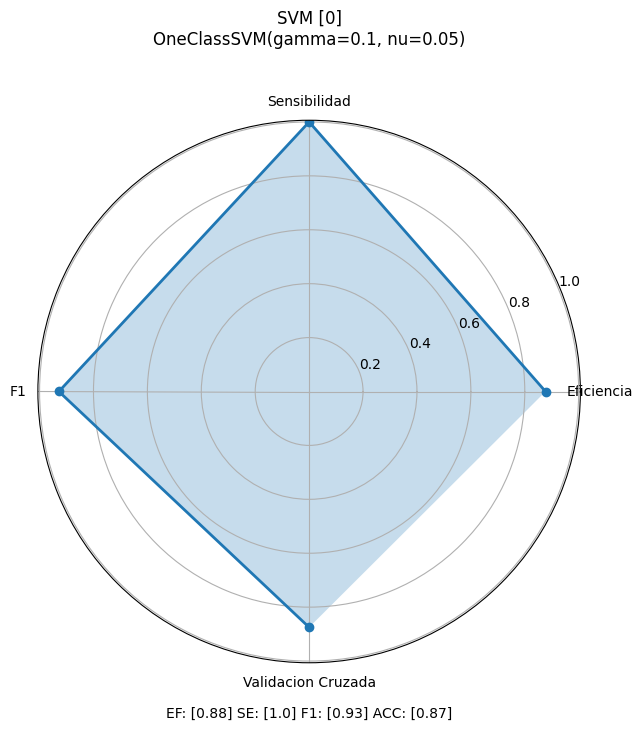

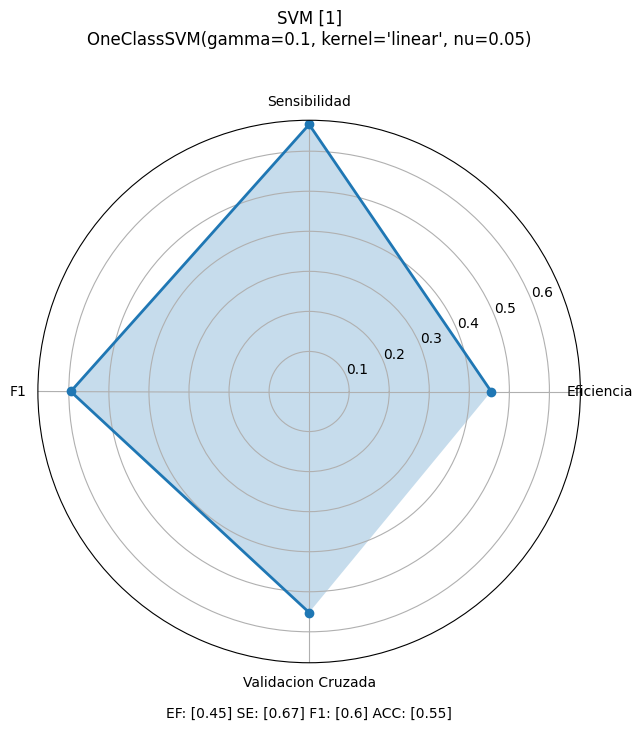

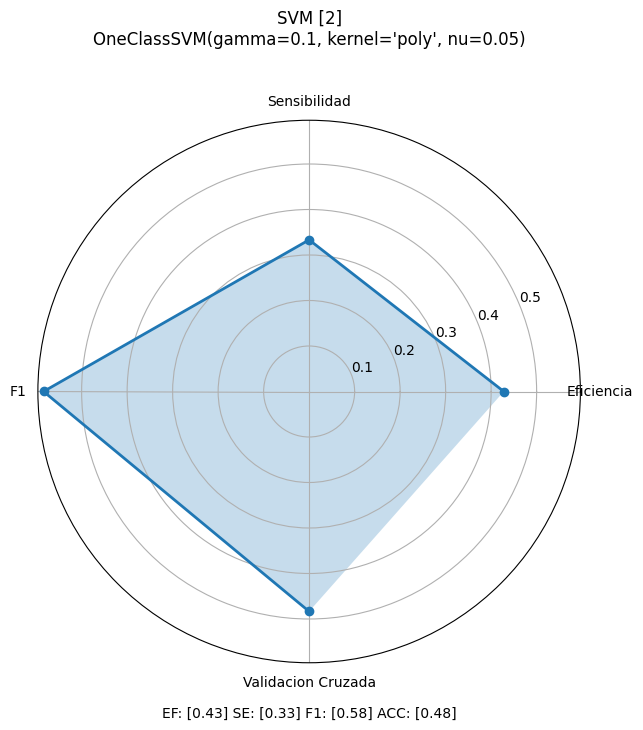

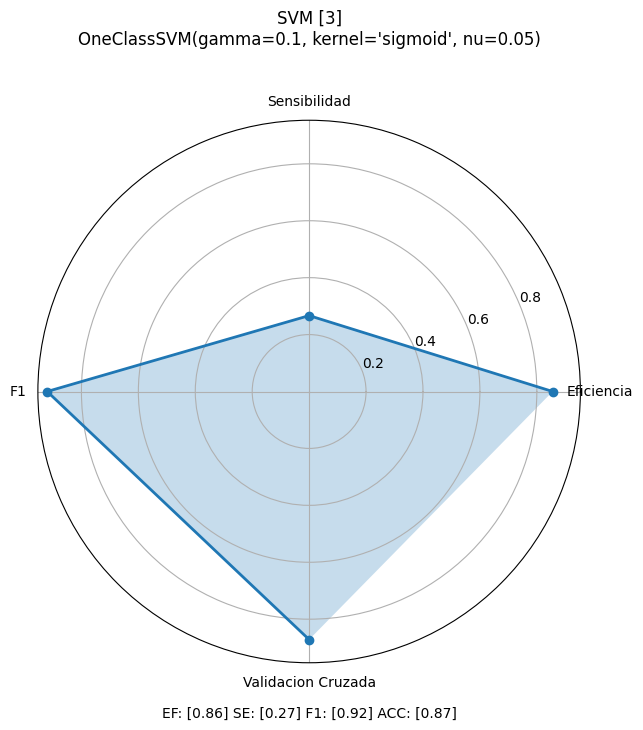

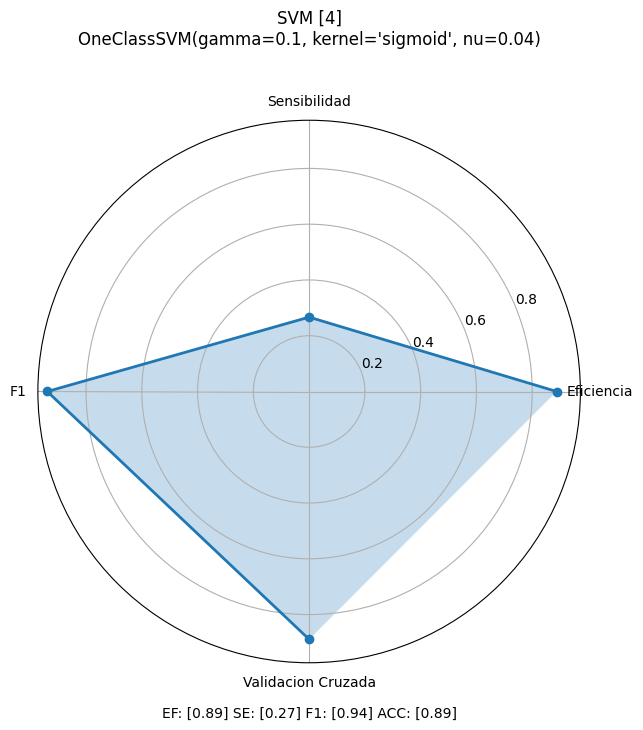

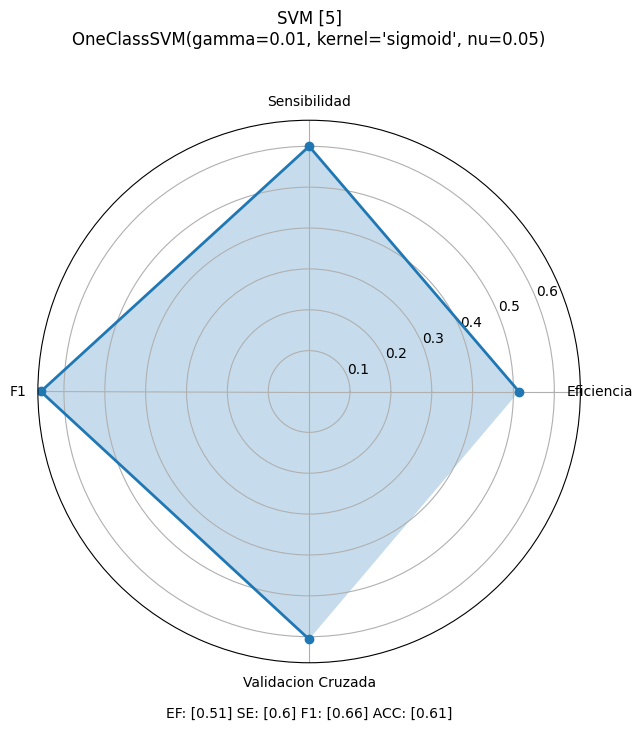

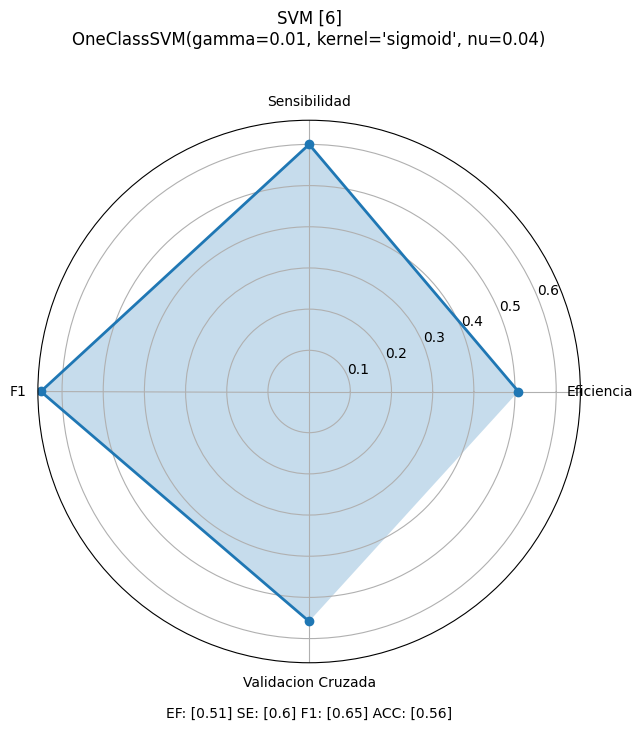

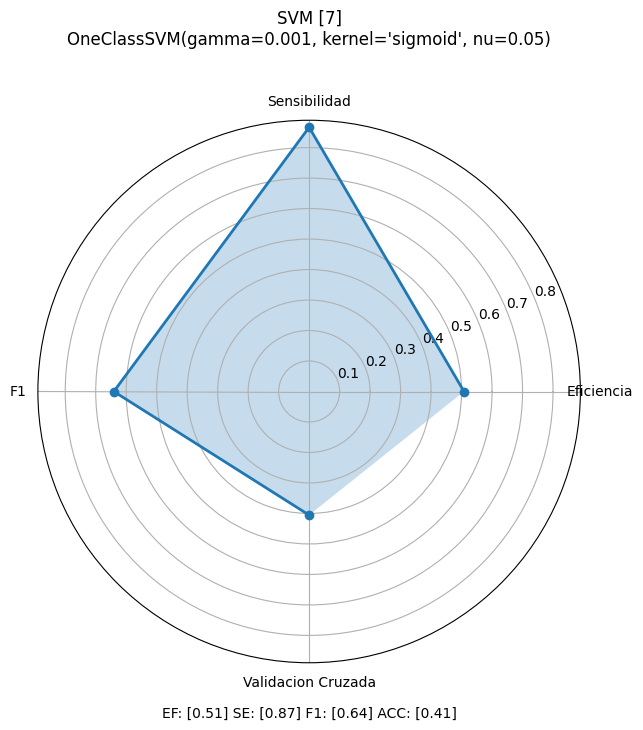

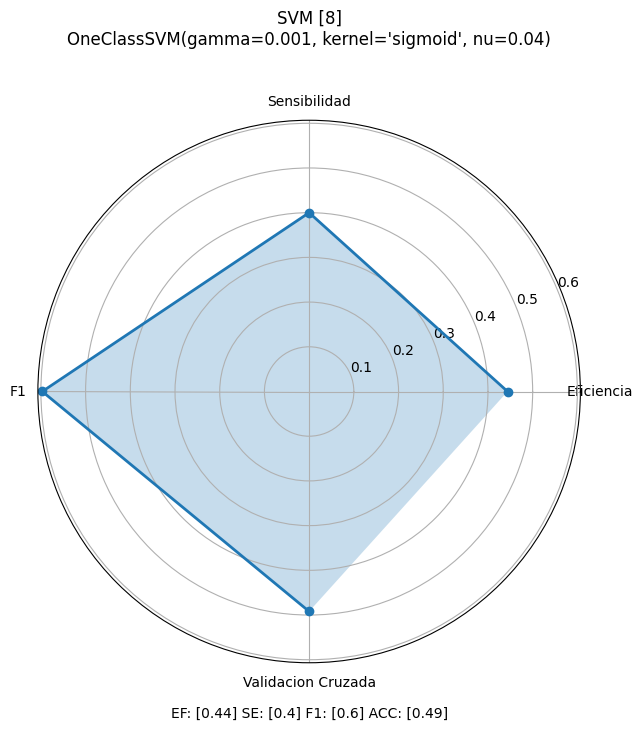

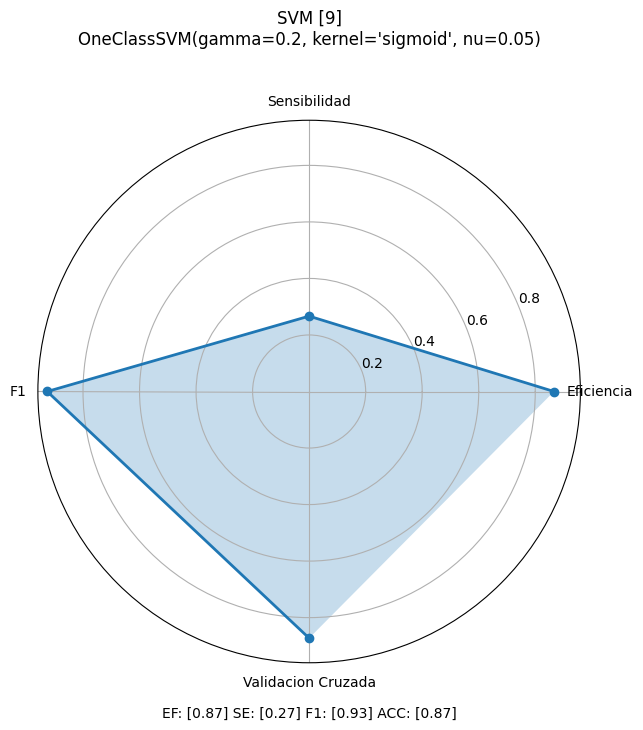

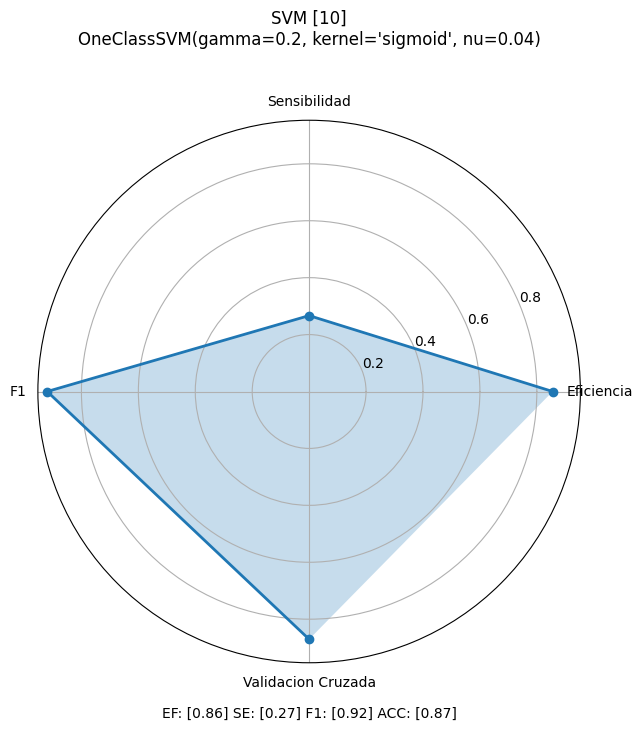

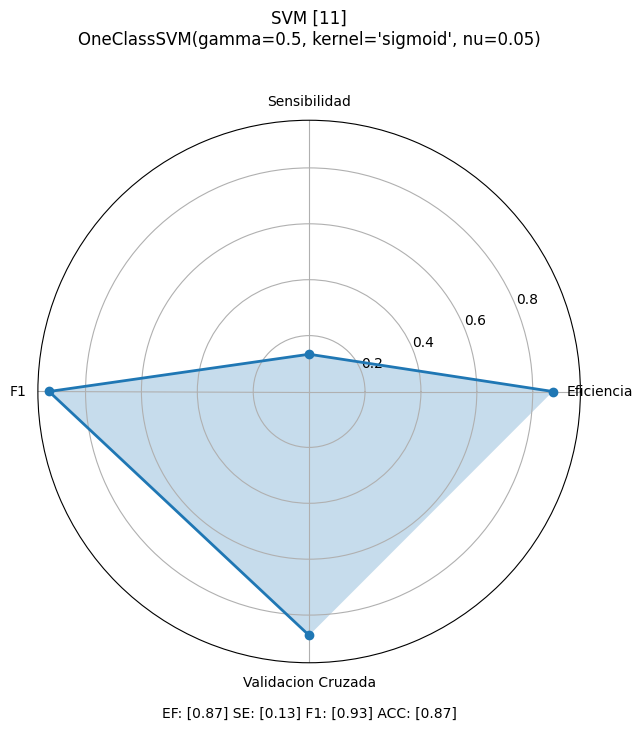

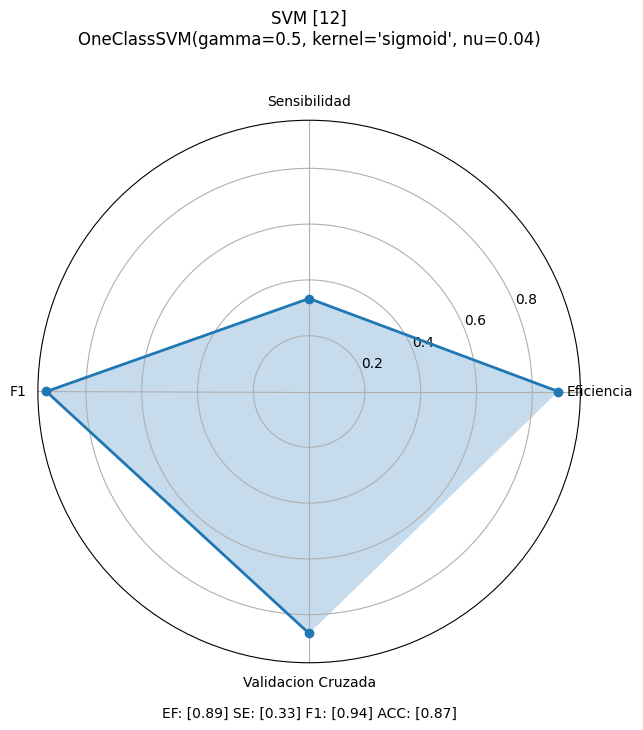

In [ ]:
fn_graficar_variables(df_grid_resultados[df_grid_resultados['MODELO'] == 'SVM'])

#### Isolated Forest

In [ ]:
fn_graficar_variables(df_grid_resultados[df_grid_resultados['MODELO'] == 'IF'])

####Random Forest

In [ ]:
fn_graficar_variables(df_grid_resultados[df_grid_resultados['MODELO'] == 'RF'])

##Evaluacion del enfoque basado en modelo - **Set de datos resumido etiquetados**.

###Seleccion de algortimos

Posteriormente a las dos itreciones, procedemos a seleccionar el algoritmo y configuracion optima (SVM[0]), para evaluar el enfoque basado en modelos.

In [ ]:
param_grid = [
    [
        ["SVM", {"kernel": 'rbf',"nu": 0.05,"gamma": 0.1}]
    ]
]

In [ ]:
df_grid_resultados = pd.DataFrame(columns=['CONFIGURACION','MODELO','RESULTADO_AC','RESULTADO_SENS','RESULTADO_F1','RESULTADO_ACC','CONFIGURACION_MODELO'])
df_y_pred,df_y_test_reglas,df_y_test=fn_evaluar_modelo(df_recorrido,param_grid,df_modelo,False)
df_grid_resultados

<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWa

CONFIGURACION MODELO  RESULTADO_AC  RESULTADO_SENS  RESULTADO_F1  \
0             0    SVM      0.877005             1.0      0.928349   

   RESULTADO_ACC             CONFIGURACION_MODELO  
0       0.874866  OneClassSVM(gamma=0.1, nu=0.05)

In [ ]:
df_recorrido.head()

NUM_AUTORIZACION_TC  MON_MOVIMIENTO_QUETZALIZADO  NUM_CTA_DEB  \
COD_CLIENTE                                                                  
37007                     915760                        500.0        26720   
36350                     912289                        100.0        41042   
36350                     837673                        100.0        41042   
36655                     850608                        500.0        38229   
29546                     858537                        100.0        11197   

             hora  PAIS_ORIGEN  COD_MONEDA_ORIGEN  COD_PROD_EMISOR  \
COD_CLIENTE                                                          
37007          18           37                 29                4   
36350          19           37                 29                5   
36350           9           37                 29                5   
36655          16           37                 29                4   
29546          14           37                 29                2   

             TIP_NEGOCIO  IND_ANOMALA  IND_ESTADO_INACTIVA  ...  \
COD_CLIENTE                                                 ...   
37007               2724            1                    0  ...   
36350               3721            1                    0  ...   
36350               1661            1                    0  ...   
36655               3988            1                    0  ...   
29546               1761            1                    0  ...   

             CNT_CUENTAS_DISTINTAS  IND_DEBAJO_UMBRAL_15K  IND_SUP_15K  \
COD_CLIENTE                                                              
37007                            1                      0            0   
36350                            1                      0            0   
36350                            1                      0            0   
36655                            1                      0            0   
29546                            1                      0            0   

             CNT_RETIRO_CUENTA  CNT_CAJEROS_DISTINTOS  IND_ACTIVIDAD  \
COD_CLIENTE                                                            
37007                        1                      1              0   
36350                        1                      1              0   
36350                        1                      1              0   
36655                        1                      1              0   
29546                        1                      1              0   

             IND_CANTIDAD  IND_LOCALIZACION  IND_REGLAS  IND_CLASE_REGLAS  
COD_CLIENTE                                                                
37007                   0                 0           0                NA  
36350                   0                 0           0                NA  
36350                   0                 0           0                NA  
36655                   1                 0           1              BAJA  
29546                   0                 0           0                NA  

[5 rows x 21 columns]

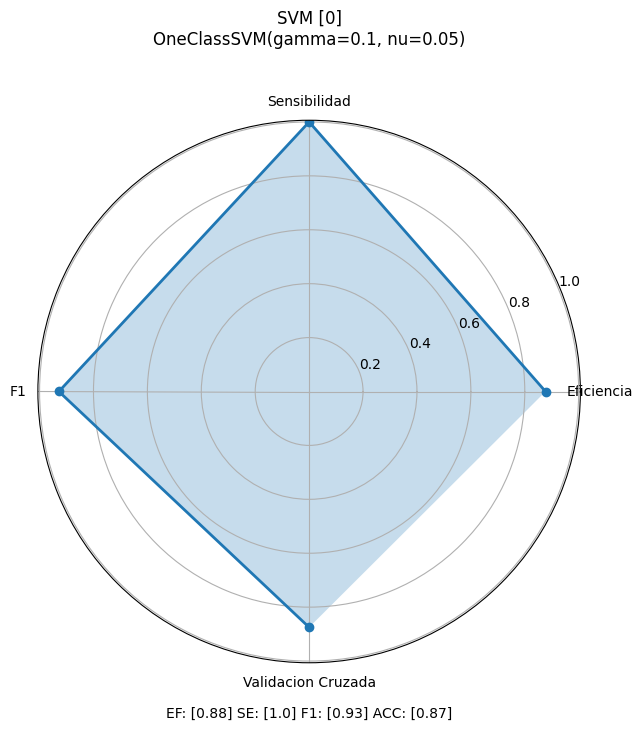

In [ ]:
fn_graficar_variables(df_grid_resultados)

###Evaluacion del enfoque basado en reglas - **Set de datos resumido etiquetados**.

####Clasificacion bayesiana

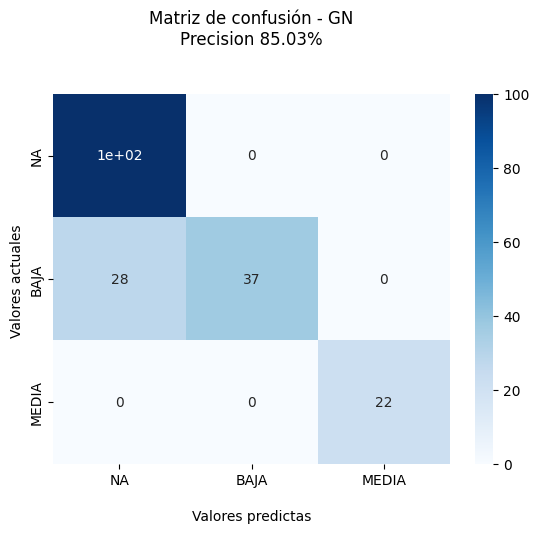

In [ ]:
fn_evaluacion_modelos('GN',df_y_pred,df_y_test_reglas)

###Validacion del modelo

#####SVM

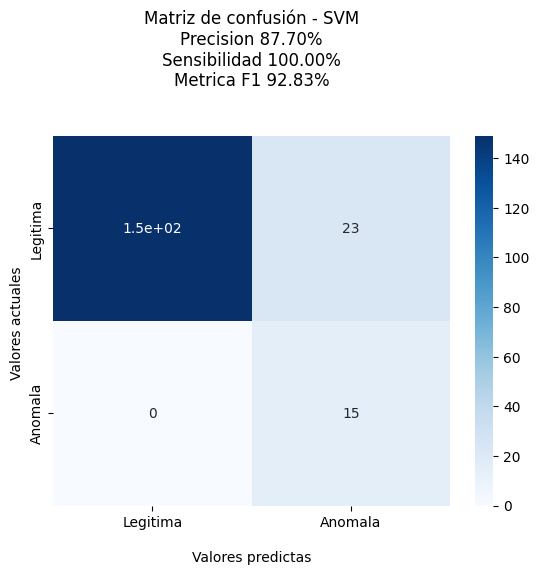

In [ ]:
fn_evaluacion_modelos('SVM',df_y_pred,df_y_test)

##Evaluación del modelo hibrido - **Set de datos resumido etiquetados**.

In [ ]:
#Eliminacion de variables innecesarias
df_y_pred = df_y_pred.drop(['IND_ANOMALA_IF','IND_ANOMALA_RF','IND_ACC_IF','IND_ACC_RF'], axis=1)
fn_df_to_CSV(df_y_pred,'PREDICCION')
df_y_pred.head(10)

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/PREDICCION_2023-04-09 154747.csv


NUM_AUTORIZACION_TC IND_ANOMALA_SVM IND_ANOMALA_GN  IND_ACC_SVM
0              915760             [1]             NA          1.0
1              912289            [-1]             NA          0.8
2              837673             [1]             NA          1.0
3              850608             [1]             NA          1.0
4              858537             [1]             NA          1.0
5              857889             [1]             NA          1.0
6              831989             [1]             NA          1.0
7              817748             [1]           BAJA          1.0
8              905946             [1]             NA          1.0
9              841806             [1]             NA          1.0

###Outliers

Se alamacena en bitacora **RESULTADO_OUT.csv** el set de outliers detectados por el modelo.

In [ ]:
df_resultado_modelo_hibrido_out=fn_construccion_modelo_hibrido(df_y_pred,'SVM','out')
fn_df_to_CSV(df_resultado_modelo_hibrido_out,'RESULTADO_OUT')
fn_descripcion_dataFrame(df_resultado_modelo_hibrido_out)

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/RESULTADO_OUT_2023-04-09 154747.csv
Dimensiones dataframe:  (1, 3)

NUM_AUTORIZACION_TC    object
IND_ANOMALA_SVM        object
IND_ANOMALA_GN         object
dtype: object


In [ ]:
df_resultado_modelo_hibrido_out.head()

NUM_AUTORIZACION_TC IND_ANOMALA_SVM IND_ANOMALA_GN
185              957456            [-1]          MEDIA

###Inliers

Se alamacena en bitacora **RESULTADO_IN.csv** el set de inliers detectados por el modelo.

In [ ]:
df_resultado_modelo_hibrido_in=fn_construccion_modelo_hibrido(df_y_pred,'SVM','in')
fn_df_to_CSV(df_resultado_modelo_hibrido_in,'RESULTADO_IN')
fn_descripcion_dataFrame(df_resultado_modelo_hibrido_in)

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/RESULTADO_IN_2023-04-09 154747.csv
Dimensiones dataframe:  (37, 3)

NUM_AUTORIZACION_TC    object
IND_ANOMALA_SVM        object
IND_ANOMALA_GN         object
dtype: object


In [ ]:
df_resultado_modelo_hibrido_in.head()

NUM_AUTORIZACION_TC IND_ANOMALA_SVM IND_ANOMALA_GN
1               912289            [-1]             NA
26              902289            [-1]             NA
31              937611            [-1]             NA
41              901470            [-1]             NA
45              824852            [-1]             NA

In [ ]:
fn_registro_log(fecha_inicial)

#Modelo hibrido final - **Set de datos anonimizado**.


**4.10**

In [ ]:
df_columnas_final=df_columnas.copy()
df_columnas_final.remove('IND_ANOMALA')
lst_columnas_int64_final=lst_columnas_int64.copy()
lst_columnas_int64_final.remove('IND_ANOMALA')

In [ ]:
df = pd.read_csv(w_ruta_final,sep=",")
df_reglas = df[lst_reglas]

df=df[df_columnas_final]

In [ ]:
df=fn_transformacion_df(df)

Datos cargados..


In [ ]:
fn_descripcion_dataFrame(df)

Dimensiones dataframe:  (110114, 18)

NUM_AUTORIZACION_TC                     int64
MON_MOVIMIENTO_QUETZALIZADO           float64
FEC_AUTORIZACION               datetime64[ns]
TIP_NEGOCIO                             int64
PAIS_ORIGEN                             int64
COD_MONEDA_ORIGEN                       int64
COD_PROD_EMISOR                         int64
NUM_CTA_DEB                             int64
IND_ESTADO_INACTIVA                     int64
PORC_RETIRO                           float64
CNT_CUENTAS_DISTINTAS                   int64
IND_DEBAJO_UMBRAL_15K                   int64
IND_SUP_15K                             int64
CNT_RETIRO_CUENTA                       int64
CNT_CAJEROS_DISTINTOS                   int64
día                                     int64
hora                                    int64
dia_semana                              int64
dtype: object


In [ ]:
df_modelo,df_ultimo_periodo=fn_calculo_test(df,lst_columnas_int64_final)

w_df_entrenamiento 2005-05-01 00:55:00 2005-10-31 23:58:00
w_df_test 2005-11-01 00:34:00 2005-11-29 23:31:00


##Generacion de informes de datos anonimizados

###Datos de entranamiento

In [ ]:
profile = ProfileReport(df_modelo, title="Analisis - Enrique Magnani - Datos de Entrenamiento")
profile.to_file(w_ruta_GD+w_ruta_pd)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/multimethod/__init__.py:315: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###Datos de prueba

In [ ]:
profile = ProfileReport(df_ultimo_periodo, title="Analisis - Enrique Magnani - Datos de Prueba")
profile.to_file(w_ruta_GD+w_ruta_pdp)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/multimethod/__init__.py:315: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fn_descripcion_dataFrame(df_ultimo_periodo)

Dimensiones dataframe:  (20811, 15)

NUM_AUTORIZACION_TC              int64
MON_MOVIMIENTO_QUETZALIZADO    float64
NUM_CTA_DEB                      int64
hora                             int64
PAIS_ORIGEN                      int64
COD_MONEDA_ORIGEN                int64
COD_PROD_EMISOR                  int64
TIP_NEGOCIO                      int64
IND_ESTADO_INACTIVA              int64
PORC_RETIRO                    float64
CNT_CUENTAS_DISTINTAS            int64
IND_DEBAJO_UMBRAL_15K            int64
IND_SUP_15K                      int64
CNT_RETIRO_CUENTA                int64
CNT_CAJEROS_DISTINTOS            int64
dtype: object


##Enfoque basado en reglas

In [ ]:
df_reglas=fn_calcular_categoria(df_reglas)
df_reglas=df_reglas[lst_reglas_def]

#Entrenar modelo con transacciones anomalas o no
scalerGN = StandardScaler()

w_train = scalerGN.fit_transform(df_reglas[lst_reglas])
y_train = df_reglas['IND_CLASE_REGLAS'].copy().values

w_train=w_train.tolist()
y_train=y_train.tolist()

Construccion de modelo bayesiano con mejores parametros

In [ ]:
# Se aplican los mejores parametros
clf = GaussianNB(priors=clfopt.best_params_["priors"],var_smoothing=clfopt.best_params_["var_smoothing"])
 
# Entrenamos el clasificador con los datos dummies
clf.fit(w_train, y_train)

GaussianNB(var_smoothing=8.111308307896856e-09)

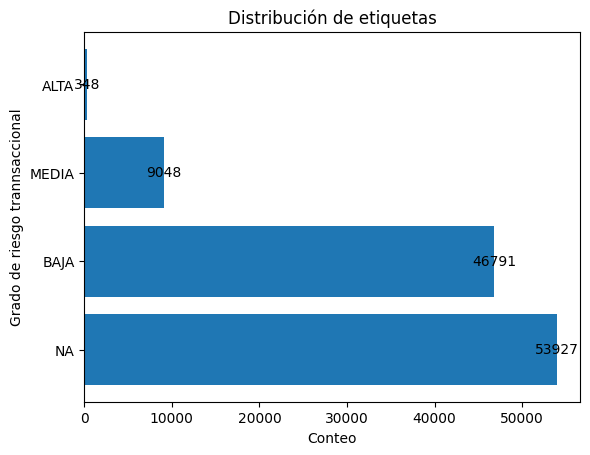

In [ ]:
conteo = {}
for elemento in y_train:
    if elemento in conteo:
        conteo[elemento] += 1
    else:
        conteo[elemento] = 1

# Ordenar los valores del diccionario en orden descendente
conteo_ordenado = dict(sorted(conteo.items(), key=lambda x: x[1], reverse=True))

# Crear el gráfico de barras horizontales
plt.barh(list(conteo_ordenado.keys()), list(conteo_ordenado.values()))

# Agregar etiquetas a las barras
for i, v in enumerate(conteo_ordenado.values()):
    plt.text(v+0.1, i, str(v), ha='center', va='center')

# Agregar títulos y etiquetas de los ejes
plt.title('Distribución de etiquetas')
plt.ylabel('Grado de riesgo trannsaccional')
plt.xlabel('Conteo')

# Mostrar el gráfico
plt.show()

##Enfoque basado en modelos

In [ ]:
lst_clientes_test=(df_ultimo_periodo.index.unique())
df_recorrido = df_ultimo_periodo[df_ultimo_periodo.index.isin(lst_clientes_test)]

#Calcular el campo calculado de reglas
df_recorrido = df_ultimo_periodo

Segmentación del set de datos.

*   df_modelo - Datos de entrenamiento (5 meses)
*   df_ultimo_periodo -  Datos de prueba (ultimo mes)


La variable **param_grid**, contiene la ultima configuracion optima definidia para SVM.

In [ ]:
df_y_pred_final=fn_evaluar_modelo(df_recorrido,param_grid,df_modelo,True)
fn_descripcion_dataFrame(df_y_pred_final)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_

Dimensiones dataframe:  (20811, 8)

NUM_AUTORIZACION_TC    object
IND_ANOMALA_SVM        object
IND_ANOMALA_IF         object
IND_ANOMALA_RF         object
IND_ANOMALA_GN         object
IND_ACC_SVM            object
IND_ACC_IF             object
IND_ACC_RF             object
dtype: object


<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df_resultados=w_df_resultados.append({'NUM_AUTORIZACION_TC':row['NUM_AUTORIZACION_TC'].iloc[0],'IND_ANOMALA_SVM':p_pred_SVM,'IND_ANOMALA_IF':p_pred_IF,'IND_ANOMALA_RF':p_pred_RF,'IND_ANOMALA_GN':p_pred_GN[0].astype(str),'IND_ACC_SVM':p_ac_SVM,'IND_ACC_IF':p_ac_IF,'IND_ACC_RF':p_ac_RF},ignore_index=True)
<ipython-input-30-343d45d85049>:36: FutureWa

Se alamacena en bitacora **RESULTADO_OUT_FINAL.csv** el set de outliers detectados por el modelo.

In [ ]:
df_resultado_modelo_hibrido_out_final=fn_construccion_modelo_hibrido(df_y_pred_final,'SVM','out')
fn_df_to_CSV(df_resultado_modelo_hibrido_out_final,'RESULTADO_OUT_FINAL')
fn_descripcion_dataFrame(df_resultado_modelo_hibrido_out_final)

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/RESULTADO_OUT_FINAL_2023-04-09 154747.csv
Dimensiones dataframe:  (517, 3)

NUM_AUTORIZACION_TC    object
IND_ANOMALA_SVM        object
IND_ANOMALA_GN         object
dtype: object


In [ ]:
df_resultado_modelo_hibrido_out_final.head()

NUM_AUTORIZACION_TC IND_ANOMALA_SVM IND_ANOMALA_GN
48               932468            [-1]          MEDIA
63               848481            [-1]           ALTA
85               896815            [-1]           ALTA
110              848453            [-1]           ALTA
123              925154            [-1]          MEDIA

Se alamacena en bitacora **RESULTADO_IN_FINAL.csv** el set de inliers detectados por el modelo.

In [ ]:
df_resultado_modelo_hibrido_in_final=fn_construccion_modelo_hibrido(df_y_pred_final,'SVM','in')
fn_df_to_CSV(df_resultado_modelo_hibrido_in_final,'RESULTADO_IN_FINAL')
fn_descripcion_dataFrame(df_resultado_modelo_hibrido_in_final)

Guadar archivo /content/drive/MyDrive/VIU/TFM/Desarrollo/Resultados/RESULTADO_IN_FINAL_2023-04-09 154747.csv
Dimensiones dataframe:  (3209, 3)

NUM_AUTORIZACION_TC    object
IND_ANOMALA_SVM        object
IND_ANOMALA_GN         object
dtype: object


In [ ]:
df_resultado_modelo_hibrido_in_final.head()

NUM_AUTORIZACION_TC IND_ANOMALA_SVM IND_ANOMALA_GN
16              901451            [-1]             NA
17              905484            [-1]           BAJA
29              929218            [-1]           BAJA
34              886848            [-1]             NA
38              813330            [-1]           BAJA

#Hallazgos - **Set de datos anonimizado**.

**4.10.2**

In [ ]:
# Cargar los datos del perfil del cliente
dfOT = pd.read_csv(w_ruta_final,sep=",")

In [ ]:
df_analisis_ol=pd.merge(df_resultado_modelo_hibrido_out_final, dfOT, on='NUM_AUTORIZACION_TC')
df_analisis_ol['FEC_AUTORIZACION'] = pd.to_datetime(df_analisis_ol['FEC_AUTORIZACION'])
df_analisis_ol['hora'] = df_analisis_ol['FEC_AUTORIZACION'].dt.hour
fn_descripcion_dataFrame(df_analisis_ol)

Dimensiones dataframe:  (517, 24)

NUM_AUTORIZACION_TC                    object
IND_ANOMALA_SVM                        object
IND_ANOMALA_GN                         object
MON_MOVIMIENTO_QUETZALIZADO           float64
FEC_AUTORIZACION               datetime64[ns]
TIP_NEGOCIO                             int64
PAIS_ORIGEN                             int64
COD_MONEDA_ORIGEN                       int64
COSECHA                                object
COD_PROD_EMISOR                         int64
NUM_CTA_DEB                             int64
COD_CLIENTE                             int64
FEC_MOVIMIENTO                         object
GENERO                                  int64
EDAD                                    int64
TIPO_CLIENTE                            int64
IND_ESTADO_INACTIVA                     int64
PORC_RETIRO                           float64
CNT_CUENTAS_DISTINTAS                   int64
IND_DEBAJO_UMBRAL_15K                   int64
IND_SUP_15K                             int64

##Horario con mayor eventualidad

In [ ]:
df_conteo = df_analisis_ol[['hora','NUM_AUTORIZACION_TC']].groupby('hora').count().reset_index()
df_conteo = df_conteo.rename(columns={'NUM_AUTORIZACION_TC': 'CONTEO'})

In [ ]:
df_conteo = df_conteo.sort_values('hora', ascending=True).set_index('hora')

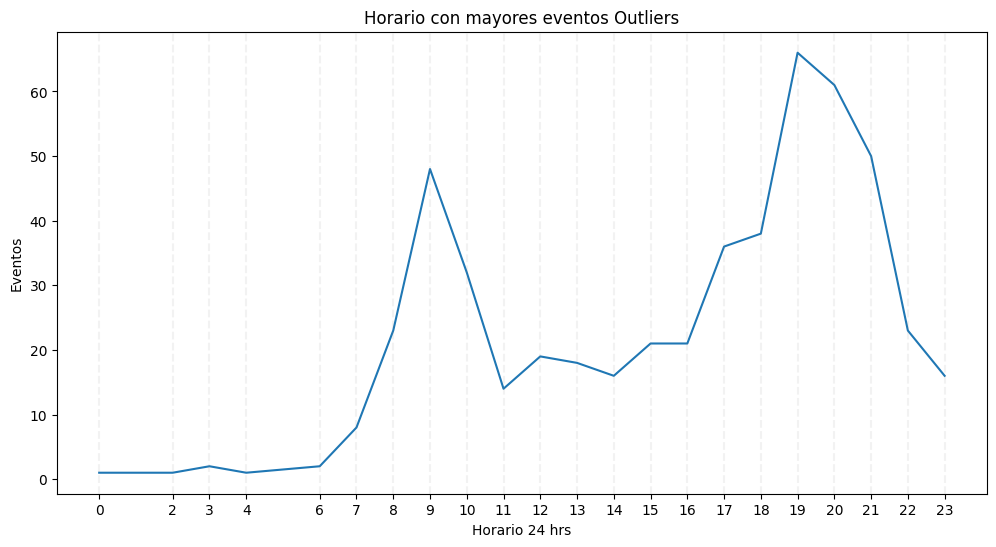

In [ ]:
fig, ax = plt.subplots()

plt.plot(df_conteo.index, df_conteo['CONTEO'])

plt.xticks(df_conteo.index)

# Agregar líneas verticales punteadas para cada valor de x
for xi in df_conteo.index:
    ax.axvline(xi, linestyle='--', color='gray', alpha=0.1)

plt.xlabel('Horario 24 hrs')
plt.ylabel('Eventos')
plt.title('Horario con mayores eventos Outliers')

fig.set_size_inches(12, 6)

plt.show()

##Edad con mayor incurrencia

In [ ]:
#Valores distintos
df_conteo_cliente = df_analisis_ol[['COD_CLIENTE','EDAD']].drop_duplicates(subset=['COD_CLIENTE','EDAD'])

In [ ]:
df_conteo_edad = df_conteo_cliente[['EDAD','COD_CLIENTE']].groupby('EDAD').count().reset_index()
df_conteo_edad = df_conteo_edad.rename(columns={'COD_CLIENTE': 'CONTEO'})
df_conteo_edad = df_conteo_edad.sort_values('EDAD', ascending=True).set_index('EDAD')

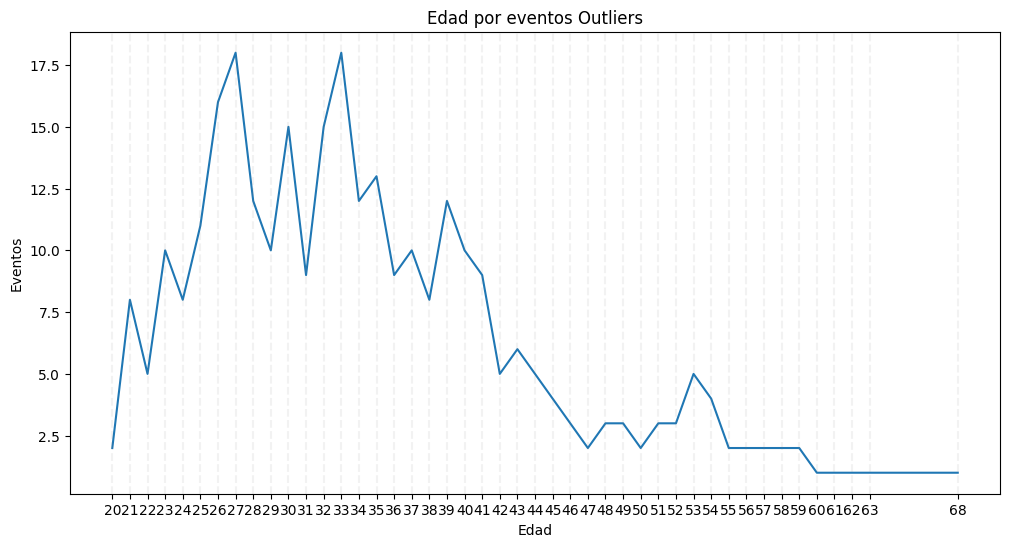

In [ ]:
fig, ax = plt.subplots()

plt.plot(df_conteo_edad.index, df_conteo_edad['CONTEO'])

plt.xticks(df_conteo_edad.index)

# Agregar líneas verticales punteadas para cada valor de x
for xi in df_conteo_edad.index:
    ax.axvline(xi, linestyle='--', color='gray', alpha=0.1)

plt.xlabel('Edad')
plt.ylabel('Eventos')
plt.title('Edad por eventos Outliers')

# Establecer tamaño de figura
fig.set_size_inches(12, 6) # especificar tamaño de 10 pulgadas de ancho y 6 pulgadas de alto

plt.show()

##Dias de la semana con mayor afectación

In [ ]:
df_an=df_analisis_ol.copy()
df_an['FEC_AUTORIZACION'] = pd.to_datetime(df_an['FEC_AUTORIZACION'])
df_an['dia_semana'] = df_an['FEC_AUTORIZACION'].dt.weekday

df_conteo_dia_semana = df_an[['dia_semana','NUM_AUTORIZACION_TC']].groupby('dia_semana').count().reset_index()
df_conteo_dia_semana = df_conteo_dia_semana.rename(columns={'NUM_AUTORIZACION_TC': 'CONTEO'})
df_conteo_dia_semana = df_conteo_dia_semana.sort_values('dia_semana', ascending=True).set_index('dia_semana')

In [ ]:
def traducir_dia_semana(dia_num):
    dias_semana = {
        0: "lunes",
        1: "martes",
        2: "miércoles",
        3: "jueves",
        4: "viernes",
        5: "sábado",
        6: "domingo"
    }
    return dias_semana.get(dia_num, "Día inválido")

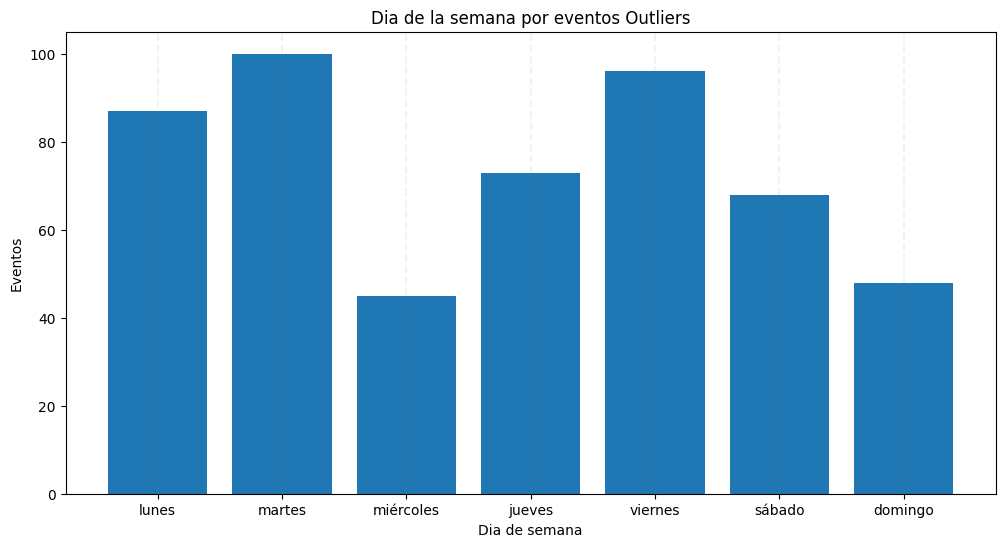

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_conteo_dia_semana.index, df_conteo_dia_semana['CONTEO'])

plt.xticks(df_conteo_dia_semana.index)

# Agregar líneas verticales punteadas para cada valor de x
for xi in df_conteo_dia_semana.index:
    ax.axvline(traducir_dia_semana(xi), linestyle='--', color='gray', alpha=0.1)

plt.xlabel('Dia de semana')
plt.ylabel('Eventos')
plt.title('Dia de la semana por eventos Outliers')

# Establecer tamaño de figura
fig.set_size_inches(12, 6) # especificar tamaño de 12 pulgadas de ancho y 6 pulgadas de alto

plt.show()